In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Suicides in India 2001-2012.csv')

In [3]:
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [4]:
df['Type_code'].unique()

array(['Causes', 'Education_Status', 'Means_adopted',
       'Professional_Profile', 'Social_Status'], dtype=object)

In [5]:
df[df['Type_code']=='Means_adopted'].head()

,State,Year,Type_code,Type,Gender,Age_group,Total
276,A & N Islands,2001,Means_adopted,By Consuming Insecticides,Female,0-14,0
277,A & N Islands,2001,Means_adopted,By Hanging,Female,0-14,2
278,A & N Islands,2001,Means_adopted,By Jumping from (Other sites),Female,0-14,0
279,A & N Islands,2001,Means_adopted,By touching electric wires,Female,0-14,0
280,A & N Islands,2001,Means_adopted,By Machine,Female,0-14,0


In [6]:
df[df['Type_code']=='Means_adopted']['Type'].unique()

array(['By Consuming Insecticides', 'By Hanging',
       'By Jumping from (Other sites)', 'By touching electric wires',
       'By Machine', 'By Fire/Self Immolation',
       'By Jumping off Moving Vehicles/Trains',
       'By Other means (please specify)', 'By Self Infliction of injury',
       'By Over Alcoholism', 'By Consuming Other Poison',
       'By coming under running vehicles/trains',
       'By Overdose of sleeping pills', 'By Jumping from (Building)',
       'By Drowning', 'By Fire-Arms', 'By Other means'], dtype=object)

In [7]:
df[(df['Type_code']=='Means_adopted') & (df['Total']>0)].head()

,State,Year,Type_code,Type,Gender,Age_group,Total
277,A & N Islands,2001,Means_adopted,By Hanging,Female,0-14,2
307,A & N Islands,2001,Means_adopted,By Hanging,Male,0-14,2
312,A & N Islands,2001,Means_adopted,By Fire/Self Immolation,Female,15-29,2
315,A & N Islands,2001,Means_adopted,By Consuming Other Poison,Female,15-29,9
316,A & N Islands,2001,Means_adopted,By Hanging,Female,15-29,20


In [8]:
df[(df['Type_code']=='Means_adopted') & (df['Total']>0)]['State'].unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'D & N Haveli',
       'Daman & Diu', 'Delhi (Ut)', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [9]:
df['State'].unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'D & N Haveli',
       'Daman & Diu', 'Delhi (Ut)', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Total (All India)', 'Total (States)', 'Total (Uts)', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [10]:
df[(df['State']=='Total (All India)') & (df['Gender']=='Male') & (df['Type_code']=='Social_Status')].drop(['Type_code', 'Gender', 'Age_group', 'State'], axis=1).groupby(['Type', 'Year']).max()

Total
Type            Year       
Divorcee        2001    708
                2002    684
                2003    588
                2004    665
                2005    559
                2006    514
                2007    526
                2008    730
                2009    635
                2010    735
                2011    554
                2012    682
Married         2001  46842
                2002  48409
                2003  49545
                2004  51623
                2005  52483
                2006  55452
                2007  57593
                2008  57639
                2009  58192
                2010  61453
                2011  62433
                2012  63343
Never Married   2001  14480
                2002  15026
                2003  15339
                2004  15769
                2005  15292
                2006  15607
                2007  16445
                2008  17809
                2009  17738
                2010  19702
                2011  19907
                2012  19727
Seperated       2001   1907
                2002   1887
                2003   1830
                2004   2231
                2005   1918
                2006   1732
                2007   2077
                2008   1731
                2009   2058
                2010   2513
                2011   2379
                2012   2043
Widowed/Widower 2001   2377
                2002   3326
                2003   2919
                2004   2363
                2005   2664
                2006   2397
                2007   2654
                2008   2635
                2009   2848
                2010   2777
                2011   2566
                2012   2658

In [11]:
def final_comparison(female, male):
    mf = pd.merge(female, male, on=['Year','Type'], how='inner')
    mf = mf.rename(columns={'Total_x':'Total_female', 'Total_y':'Total_male', 'Type':'Social_Status'})
    mf['%_More']=((mf['Total_male']-mf['Total_female'])*100)/mf['Total_female']
    mf.head()

def final_graph(topic):
    mf_plot = mf.plot.line(x='Year', y=['Total_male', 'Total_female'])
    mf_plot.set_xlabel('Year')
    mf_plot.set_ylabel('No. of Deaths')
    mf_plot.set_title(topic)

---------------------------------------------------
# Gender Comaprison - Widow/Widower

In [70]:
male_widower = df[(df['State']=='Total (All India)') & (df['Gender']=='Male') & (df['Type_code']=='Social_Status') & (df['Type']=='Widowed/Widower')].drop(['Type_code', 'Gender', 'Age_group', 'State'], axis=1)
male_widower.head()

,Year,Type,Total
209501,2001,Widowed/Widower,2377
209526,2002,Widowed/Widower,3326
209551,2003,Widowed/Widower,2919
209577,2004,Widowed/Widower,2363
209603,2005,Widowed/Widower,2664


In [71]:
female_widower = df[(df['State']=='Total (All India)') & (df['Gender']=='Female') & (df['Type_code']=='Social_Status') & (df['Type']=='Widowed/Widower')].drop(['Type_code', 'Gender', 'Age_group', 'State'], axis=1)
female_widower.head()

,Year,Type,Total
209495,2001,Widowed/Widower,2548
209519,2002,Widowed/Widower,3025
209544,2003,Widowed/Widower,2568
209573,2004,Widowed/Widower,2377
209598,2005,Widowed/Widower,2407


In [72]:
mf = pd.merge(female_widower, male_widower, on=['Year','Type'], how='inner')
mf = mf.rename(columns={'Total_x':'Total_female', 'Total_y':'Total_male', 'Type':'Social_Status'})
mf['%_More']=((mf['Total_male']-mf['Total_female'])*100)/mf['Total_female']
mf.head()

,Year,Social_Status,Total_female,Total_male,%_More
0,2001,Widowed/Widower,2548,2377,-6.711146
1,2002,Widowed/Widower,3025,3326,9.950413
2,2003,Widowed/Widower,2568,2919,13.668224
3,2004,Widowed/Widower,2377,2363,-0.588978
4,2005,Widowed/Widower,2407,2664,10.677192


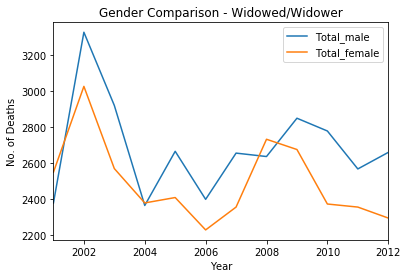

In [73]:
final_graph('Gender Comparison - Widowed/Widower')

--------------------------------------------------------
# Gender Comparison - Married

In [16]:
male_married = df[(df['State']=='Total (All India)') & (df['Gender']=='Male') & (df['Type_code']=='Social_Status') & (df['Type']=='Married')].drop(['Type_code', 'Gender', 'Age_group', 'State'], axis=1)
male_married.head()

,Year,Type,Total
209498,2001,Married,46842
209525,2002,Married,48409
209549,2003,Married,49545
209579,2004,Married,51623
209604,2005,Married,52483


In [17]:
female_married = df[(df['State']=='Total (All India)') & (df['Gender']=='Female') & (df['Type_code']=='Social_Status') & (df['Type']=='Married')].drop(['Type_code', 'Gender', 'Age_group', 'State'], axis=1)
female_married.head()

,Year,Type,Total
209492,2001,Married,28281
209518,2002,Married,26936
209547,2003,Married,27603
209571,2004,Married,28045
209597,2005,Married,28188


In [18]:
mf = pd.merge(female_married, male_married, on=['Year','Type'], how='inner')
mf = mf.rename(columns={'Total_x':'Total_female', 'Total_y':'Total_male', 'Type':'Social_Status'})
mf['%_More']=((mf['Total_male']-mf['Total_female'])*100)/mf['Total_female']
mf.head()

,Year,Social_Status,Total_female,Total_male,%_More
0,2001,Married,28281,46842,65.630635
1,2002,Married,26936,48409,79.718592
2,2003,Married,27603,49545,79.491360
3,2004,Married,28045,51623,84.072027
4,2005,Married,28188,52483,86.189159


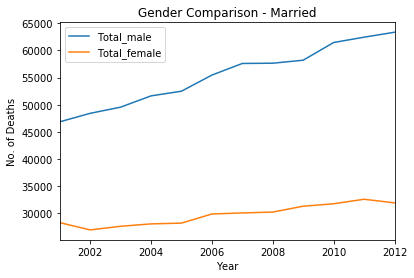

In [19]:
final_graph('Gender Comparison - Married')

-----------------------------------------------------------
# Gender Comparison - Separated

In [20]:
male_separated = df[(df['State']=='Total (All India)') & (df['Gender']=='Male') & (df['Type_code']=='Social_Status') & (df['Type']=='Seperated')].drop(['Type_code', 'Gender', 'Age_group', 'State'], axis=1)
male_separated.head()

,Year,Type,Total
209499,2001,Seperated,1907
209527,2002,Seperated,1887
209553,2003,Seperated,1830
209576,2004,Seperated,2231
209602,2005,Seperated,1918


In [21]:
female_separated = df[(df['State']=='Total (All India)') & (df['Gender']=='Female') & (df['Type_code']=='Social_Status') & (df['Type']=='Seperated')].drop(['Type_code', 'Gender', 'Age_group', 'State'], axis=1)
female_separated.head()

,Year,Type,Total
209494,2001,Seperated,1137
209520,2002,Seperated,1224
209546,2003,Seperated,1122
209574,2004,Seperated,1269
209599,2005,Seperated,1223


In [22]:
mf = pd.merge(female_separated, male_separated, on=['Year','Type'], how='inner')
mf = mf.rename(columns={'Total_x':'Total_female', 'Total_y':'Total_male', 'Type':'Social_Status'})
mf['%_More']=((mf['Total_male']-mf['Total_female'])*100)/mf['Total_female']
mf.head()

,Year,Social_Status,Total_female,Total_male,%_More
0,2001,Seperated,1137,1907,67.722076
1,2002,Seperated,1224,1887,54.166667
2,2003,Seperated,1122,1830,63.101604
3,2004,Seperated,1269,2231,75.807723
4,2005,Seperated,1223,1918,56.827473


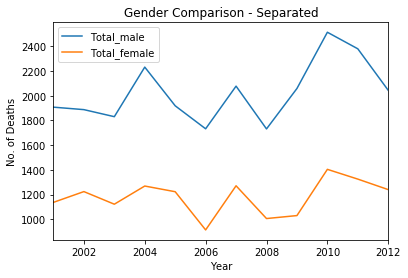

In [23]:
final_graph('Gender Comparison - Separated')

-----------------------------------------------------------
# Gender Comparison - Divorcee

In [24]:
male_divorcee = df[(df['State']=='Total (All India)') & (df['Gender']=='Male') & (df['Type_code']=='Social_Status') & (df['Type']=='Divorcee')].drop(['Type_code', 'Gender', 'Age_group', 'State'], axis=1)
male_divorcee.head()

,Year,Type,Total
209500,2001,Divorcee,708
209523,2002,Divorcee,684
209550,2003,Divorcee,588
209575,2004,Divorcee,665
209601,2005,Divorcee,559


In [25]:
female_divorcee = df[(df['State']=='Total (All India)') & (df['Gender']=='Female') & (df['Type_code']=='Social_Status') & (df['Type']=='Divorcee')].drop(['Type_code', 'Gender', 'Age_group', 'State'], axis=1)
female_divorcee.head()

,Year,Type,Total
209496,2001,Divorcee,643
209521,2002,Divorcee,675
209545,2003,Divorcee,539
209570,2004,Divorcee,532
209596,2005,Divorcee,562


In [26]:
mf = pd.merge(female_divorcee, male_divorcee, on=['Year','Type'], how='inner')
mf = mf.rename(columns={'Total_x':'Total_female', 'Total_y':'Total_male', 'Type':'Social_Status'})
mf['%_More']=((mf['Total_male']-mf['Total_female'])*100)/mf['Total_female']
mf.head()

,Year,Social_Status,Total_female,Total_male,%_More
0,2001,Divorcee,643,708,10.108865
1,2002,Divorcee,675,684,1.333333
2,2003,Divorcee,539,588,9.090909
3,2004,Divorcee,532,665,25.000000
4,2005,Divorcee,562,559,-0.533808


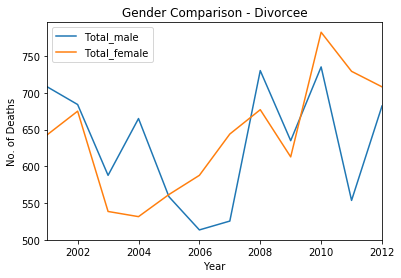

In [27]:
final_graph('Gender Comparison - Divorcee')

----------------------------------------------------------------

In [28]:
df[df['Type_code']=='Social_Status']['Type'].unique()

array(['Married', 'Seperated', 'Widowed/Widower', 'Divorcee',
       'Never Married'], dtype=object)

-----------------------------------------------------------
# Gender Comparison - Never Married

In [29]:
male_nvm = df[(df['State']=='Total (All India)') & (df['Gender']=='Male') & (df['Type_code']=='Social_Status') & (df['Type']=='Never Married')].drop(['Type_code', 'Gender', 'Age_group', 'State'], axis=1)
male_nvm.head()

,Year,Type,Total
209497,2001,Never Married,14480
209524,2002,Never Married,15026
209552,2003,Never Married,15339
209578,2004,Never Married,15769
209605,2005,Never Married,15292


In [30]:
female_nvm = df[(df['State']=='Total (All India)') & (df['Gender']=='Female') & (df['Type_code']=='Social_Status') & (df['Type']=='Never Married')].drop(['Type_code', 'Gender', 'Age_group', 'State'], axis=1)
female_nvm.head()

,Year,Type,Total
209493,2001,Never Married,9583
209522,2002,Never Married,9225
209548,2003,Never Married,8798
209572,2004,Never Married,8823
209600,2005,Never Married,8618


In [31]:
mf = pd.merge(female_nvm, male_nvm, on=['Year','Type'], how='inner')
mf = mf.rename(columns={'Total_x':'Total_female', 'Total_y':'Total_male', 'Type':'Social_Status'})
mf['%_More']=((mf['Total_male']-mf['Total_female'])*100)/mf['Total_female']
mf.head()

,Year,Social_Status,Total_female,Total_male,%_More
0,2001,Never Married,9583,14480,51.100908
1,2002,Never Married,9225,15026,62.883469
2,2003,Never Married,8798,15339,74.346442
3,2004,Never Married,8823,15769,78.726057
4,2005,Never Married,8618,15292,77.442562


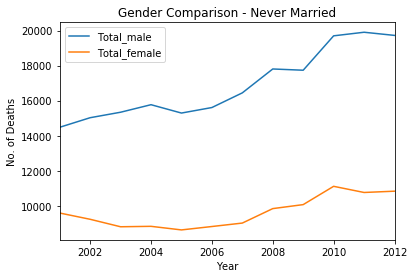

In [32]:
final_graph('Gender Comparison - Never Married')

---------------------------------------------------------
---------------------------------------------------------
---------------------------------------------------------
---------------------------------------------------------

In [33]:
df[(df['State']=='Total (All India)') & (df['Gender']=='Male')]['Type_code'].unique()

array(['Education_Status', 'Social_Status'], dtype=object)

In [34]:
df[(df['State']=='Total (All India)') & (df['Gender']=='Male') & (df['Type_code']=='Education_Status')]['Type'].unique()

array(['No Education', 'Post Graduate and Above',
       'Hr. Secondary/Intermediate/Pre-Universit', 'Graduate', 'Diploma',
       'Middle', 'Matriculate/Secondary', 'Primary'], dtype=object)

---------------------------------------------------------
---------------------------------------------------------
---------------------------------------------------------
---------------------------------------------------------

# Gender Comparison - No Education

In [35]:
male_ne = df[(df['State']=='Total (All India)') & (df['Gender']=='Male') & (df['Type_code']=='Education_Status') & (df['Type']=='No Education')].drop(['Type_code', 'Gender', 'Age_group', 'State'], axis=1)
male_ne.head()

,Year,Type,Total
209484,2001,No Education,15908
209514,2002,No Education,16069
209537,2003,No Education,15108
209564,2004,No Education,15690
209595,2005,No Education,15244


In [36]:
female_ne = df[(df['State']=='Total (All India)') & (df['Gender']=='Female') & (df['Type_code']=='Education_Status') & (df['Type']=='No Education')].drop(['Type_code', 'Gender', 'Age_group', 'State'], axis=1)
female_ne.head()

,Year,Type,Total
209479,2001,No Education,12817
209503,2002,No Education,12373
209531,2003,No Education,10856
209560,2004,No Education,11226
209587,2005,No Education,10990


In [37]:
mf = pd.merge(female_ne, male_ne, on=['Year','Type'], how='inner')
mf = mf.rename(columns={'Total_x':'Total_female', 'Total_y':'Total_male', 'Type':'Social_Status'})
mf['%_More']=((mf['Total_male']-mf['Total_female'])*100)/mf['Total_female']
mf.head()

,Year,Social_Status,Total_female,Total_male,%_More
0,2001,No Education,12817,15908,24.116408
1,2002,No Education,12373,16069,29.871494
2,2003,No Education,10856,15108,39.167281
3,2004,No Education,11226,15690,39.764832
4,2005,No Education,10990,15244,38.707916


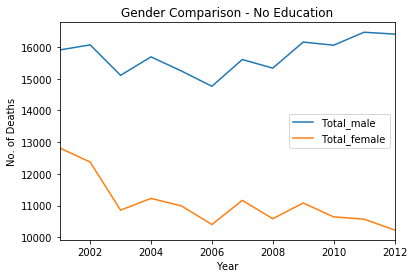

In [38]:
final_graph('Gender Comparison - No Education')

---------------------------------------------------------
# Gender Comparison - Post Graduate and Above

In [39]:
male_pg = df[(df['State']=='Total (All India)') & (df['Gender']=='Male') & (df['Type_code']=='Education_Status') & (df['Type']=='Post Graduate and Above')].drop(['Type_code', 'Gender', 'Age_group', 'State'], axis=1)
male_pg.head()

,Year,Type,Total
209485,2001,Post Graduate and Above,412
209517,2002,Post Graduate and Above,309
209536,2003,Post Graduate and Above,292
209567,2004,Post Graduate and Above,452
209592,2005,Post Graduate and Above,288


In [40]:
female_pg = df[(df['State']=='Total (All India)') & (df['Gender']=='Female') & (df['Type_code']=='Education_Status') & (df['Type']=='Post Graduate and Above')].drop(['Type_code', 'Gender', 'Age_group', 'State'], axis=1)
female_pg.head()

,Year,Type,Total
209480,2001,Post Graduate and Above,192
209506,2002,Post Graduate and Above,109
209535,2003,Post Graduate and Above,170
209557,2004,Post Graduate and Above,177
209586,2005,Post Graduate and Above,118


In [41]:
mf = pd.merge(female_pg, male_pg, on=['Year','Type'], how='inner')
mf = mf.rename(columns={'Total_x':'Total_female', 'Total_y':'Total_male', 'Type':'Social_Status'})
mf['%_More']=((mf['Total_male']-mf['Total_female'])*100)/mf['Total_female']
mf.head()

,Year,Social_Status,Total_female,Total_male,%_More
0,2001,Post Graduate and Above,192,412,114.583333
1,2002,Post Graduate and Above,109,309,183.486239
2,2003,Post Graduate and Above,170,292,71.764706
3,2004,Post Graduate and Above,177,452,155.367232
4,2005,Post Graduate and Above,118,288,144.067797


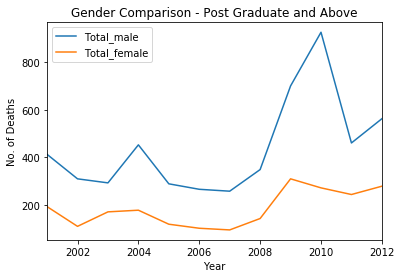

In [42]:
final_graph('Gender Comparison - Post Graduate and Above')

---------------------------------------------------------
# Gender Comparison - Hr. Secondary/Intermediate/Pre-University

In [43]:
male_pu = df[(df['State']=='Total (All India)') & (df['Gender']=='Male') & (df['Type_code']=='Education_Status') & (df['Type']=='Hr. Secondary/Intermediate/Pre-Universit')].drop(['Type_code', 'Gender', 'Age_group', 'State'], axis=1)
male_pu.head()

,Year,Type,Total
209486,2001,Hr. Secondary/Intermediate/Pre-Universit,4356
209512,2002,Hr. Secondary/Intermediate/Pre-Universit,4852
209540,2003,Hr. Secondary/Intermediate/Pre-Universit,5509
209565,2004,Hr. Secondary/Intermediate/Pre-Universit,5678
209594,2005,Hr. Secondary/Intermediate/Pre-Universit,5609


In [44]:
female_pu = df[(df['State']=='Total (All India)') & (df['Gender']=='Female') & (df['Type_code']=='Education_Status') & (df['Type']=='Hr. Secondary/Intermediate/Pre-Universit')].drop(['Type_code', 'Gender', 'Age_group', 'State'], axis=1)
female_pu.head()

,Year,Type,Total
209476,2001,Hr. Secondary/Intermediate/Pre-Universit,2391
209502,2002,Hr. Secondary/Intermediate/Pre-Universit,2379
209534,2003,Hr. Secondary/Intermediate/Pre-Universit,2846
209556,2004,Hr. Secondary/Intermediate/Pre-Universit,2968
209585,2005,Hr. Secondary/Intermediate/Pre-Universit,2792


In [45]:
mf = pd.merge(female_pu, male_pu, on=['Year','Type'], how='inner')
mf = mf.rename(columns={'Total_x':'Total_female', 'Total_y':'Total_male', 'Type':'Social_Status'})
mf['%_More']=((mf['Total_male']-mf['Total_female'])*100)/mf['Total_female']
mf.head()

,Year,Social_Status,Total_female,Total_male,%_More
0,2001,Hr. Secondary/Intermediate/Pre-Universit,2391,4356,82.183187
1,2002,Hr. Secondary/Intermediate/Pre-Universit,2379,4852,103.951240
2,2003,Hr. Secondary/Intermediate/Pre-Universit,2846,5509,93.569923
3,2004,Hr. Secondary/Intermediate/Pre-Universit,2968,5678,91.307278
4,2005,Hr. Secondary/Intermediate/Pre-Universit,2792,5609,100.895415


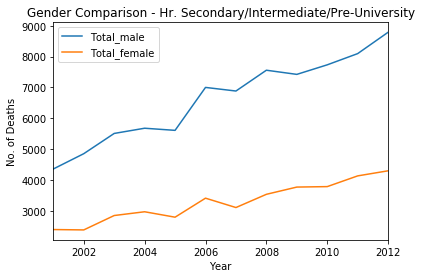

In [46]:
final_graph('Gender Comparison - Hr. Secondary/Intermediate/Pre-University')

----------------------------------------------
# Gender Comparison - Graduate

In [47]:
male_grad = df[(df['State']=='Total (All India)') & (df['Gender']=='Male') & (df['Type_code']=='Education_Status') & (df['Type']=='Graduate')].drop(['Type_code', 'Gender', 'Age_group', 'State'], axis=1)
male_grad.head()

,Year,Type,Total
209487,2001,Graduate,1286
209513,2002,Graduate,1230
209542,2003,Graduate,1445
209568,2004,Graduate,1430
209589,2005,Graduate,1406


In [48]:
female_grad = df[(df['State']=='Total (All India)') & (df['Gender']=='Female') & (df['Type_code']=='Education_Status') & (df['Type']=='Graduate')].drop(['Type_code', 'Gender', 'Age_group', 'State'], axis=1)
female_grad.head()

,Year,Type,Total
209481,2001,Graduate,584
209509,2002,Graduate,546
209528,2003,Graduate,659
209558,2004,Graduate,588
209582,2005,Graduate,628


In [49]:
mf = pd.merge(female_grad, male_grad, on=['Year','Type'], how='inner')
mf = mf.rename(columns={'Total_x':'Total_female', 'Total_y':'Total_male', 'Type':'Social_Status'})
mf['%_More']=((mf['Total_male']-mf['Total_female'])*100)/mf['Total_female']
mf.head()

,Year,Social_Status,Total_female,Total_male,%_More
0,2001,Graduate,584,1286,120.205479
1,2002,Graduate,546,1230,125.274725
2,2003,Graduate,659,1445,119.271624
3,2004,Graduate,588,1430,143.197279
4,2005,Graduate,628,1406,123.885350


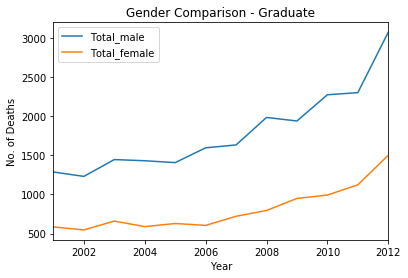

In [50]:
final_graph('Gender Comparison - Graduate')

----------------------------------------------
# Gender Comparison - Diploma

In [52]:
male_diploma = df[(df['State']=='Total (All India)') & (df['Gender']=='Male') & (df['Type_code']=='Education_Status') & (df['Type']=='Diploma')].drop(['Type_code', 'Gender', 'Age_group', 'State'], axis=1)
male_diploma.head()

,Year,Type,Total
209488,2001,Diploma,905
209510,2002,Diploma,768
209539,2003,Diploma,631
209569,2004,Diploma,601
209593,2005,Diploma,815


In [53]:
female_diploma = df[(df['State']=='Total (All India)') & (df['Gender']=='Female') & (df['Type_code']=='Education_Status') & (df['Type']=='Diploma')].drop(['Type_code', 'Gender', 'Age_group', 'State'], axis=1)
female_diploma.head()

,Year,Type,Total
209477,2001,Diploma,294
209508,2002,Diploma,328
209530,2003,Diploma,275
209555,2004,Diploma,241
209584,2005,Diploma,248


In [54]:
mf = pd.merge(female_diploma, male_diploma, on=['Year','Type'], how='inner')
mf = mf.rename(columns={'Total_x':'Total_female', 'Total_y':'Total_male', 'Type':'Social_Status'})
mf['%_More']=((mf['Total_male']-mf['Total_female'])*100)/mf['Total_female']
mf.head()

,Year,Social_Status,Total_female,Total_male,%_More
0,2001,Diploma,294,905,207.823129
1,2002,Diploma,328,768,134.146341
2,2003,Diploma,275,631,129.454545
3,2004,Diploma,241,601,149.377593
4,2005,Diploma,248,815,228.629032


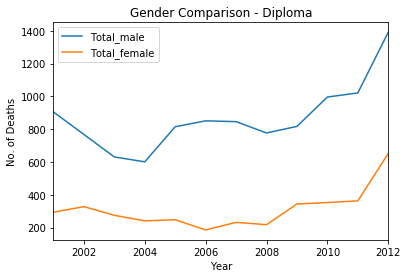

In [55]:
final_graph('Gender Comparison - Diploma')

----------------------------------------------
# Gender Comparison - Middle

In [57]:
male_middle = df[(df['State']=='Total (All India)') & (df['Gender']=='Male') & (df['Type_code']=='Education_Status') & (df['Type']=='Middle')].drop(['Type_code', 'Gender', 'Age_group', 'State'], axis=1)
male_middle.head()

,Year,Type,Total
209489,2001,Middle,15767
209511,2002,Middle,16876
209541,2003,Middle,16475
209563,2004,Middle,17491
209588,2005,Middle,18207


In [58]:
female_middle = df[(df['State']=='Total (All India)') & (df['Gender']=='Female') & (df['Type_code']=='Education_Status') & (df['Type']=='Middle')].drop(['Type_code', 'Gender', 'Age_group', 'State'], axis=1)
female_middle.head()

,Year,Type,Total
209482,2001,Middle,9143
209505,2002,Middle,8606
209532,2003,Middle,9028
209559,2004,Middle,9232
209583,2005,Middle,9111


In [59]:
mf = pd.merge(female_middle, male_middle, on=['Year','Type'], how='inner')
mf = mf.rename(columns={'Total_x':'Total_female', 'Total_y':'Total_male', 'Type':'Social_Status'})
mf['%_More']=((mf['Total_male']-mf['Total_female'])*100)/mf['Total_female']
mf.head()

,Year,Social_Status,Total_female,Total_male,%_More
0,2001,Middle,9143,15767,72.448868
1,2002,Middle,8606,16876,96.095747
2,2003,Middle,9028,16475,82.487816
3,2004,Middle,9232,17491,89.460572
4,2005,Middle,9111,18207,99.835364


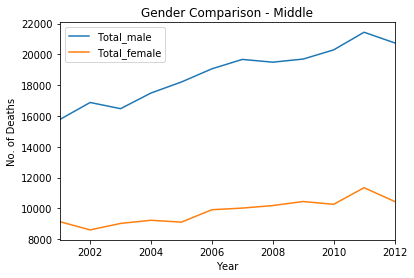

In [60]:
final_graph('Gender Comparison - Middle')

------------------------------------------------------
# Gender Comparison - Matriculate/Secondary

In [61]:
male_secondary = df[(df['State']=='Total (All India)') & (df['Gender']=='Male') & (df['Type_code']=='Education_Status') & (df['Type']=='Matriculate/Secondary')].drop(['Type_code', 'Gender', 'Age_group', 'State'], axis=1)
male_secondary.head()

,Year,Type,Total
209490,2001,Matriculate/Secondary,10898
209516,2002,Matriculate/Secondary,12025
209538,2003,Matriculate/Secondary,12538
209562,2004,Matriculate/Secondary,13313
209590,2005,Matriculate/Secondary,13369


In [62]:
female_secondary = df[(df['State']=='Total (All India)') & (df['Gender']=='Female') & (df['Type_code']=='Education_Status') & (df['Type']=='Matriculate/Secondary')].drop(['Type_code', 'Gender', 'Age_group', 'State'], axis=1)
female_secondary.head()

,Year,Type,Total
209478,2001,Matriculate/Secondary,5486
209507,2002,Matriculate/Secondary,5915
209529,2003,Matriculate/Secondary,6004
209554,2004,Matriculate/Secondary,5947
209580,2005,Matriculate/Secondary,5755


In [63]:
mf = pd.merge(female_secondary, male_secondary, on=['Year','Type'], how='inner')
mf = mf.rename(columns={'Total_x':'Total_female', 'Total_y':'Total_male', 'Type':'Social_Status'})
mf['%_More']=((mf['Total_male']-mf['Total_female'])*100)/mf['Total_female']
mf.head()

,Year,Social_Status,Total_female,Total_male,%_More
0,2001,Matriculate/Secondary,5486,10898,98.651112
1,2002,Matriculate/Secondary,5915,12025,103.296703
2,2003,Matriculate/Secondary,6004,12538,108.827448
3,2004,Matriculate/Secondary,5947,13313,123.860770
4,2005,Matriculate/Secondary,5755,13369,132.302346


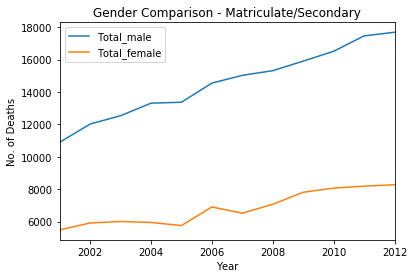

In [64]:
final_graph('Gender Comparison - Matriculate/Secondary')

---------------------------------
# Gender Comparison - Primary

In [66]:
male_primary = df[(df['State']=='Total (All India)') & (df['Gender']=='Male') & (df['Type_code']=='Education_Status') & (df['Type']=='Primary')].drop(['Type_code', 'Gender', 'Age_group', 'State'], axis=1)
male_primary.head()

,Year,Type,Total
209491,2001,Primary,16782
209515,2002,Primary,17203
209543,2003,Primary,18223
209566,2004,Primary,17996
209591,2005,Primary,17978


In [67]:
female_primary = df[(df['State']=='Total (All India)') & (df['Gender']=='Female') & (df['Type_code']=='Education_Status') & (df['Type']=='Primary')].drop(['Type_code', 'Gender', 'Age_group', 'State'], axis=1)
female_primary.head()

,Year,Type,Total
209483,2001,Primary,11285
209504,2002,Primary,10829
209533,2003,Primary,10792
209561,2004,Primary,10667
209581,2005,Primary,11356


In [68]:
mf = pd.merge(female_primary, male_primary, on=['Year','Type'], how='inner')
mf = mf.rename(columns={'Total_x':'Total_female', 'Total_y':'Total_male', 'Type':'Social_Status'})
mf['%_More']=((mf['Total_male']-mf['Total_female'])*100)/mf['Total_female']
mf.head()

,Year,Social_Status,Total_female,Total_male,%_More
0,2001,Primary,11285,16782,48.710678
1,2002,Primary,10829,17203,58.860467
2,2003,Primary,10792,18223,68.856560
3,2004,Primary,10667,17996,68.707228
4,2005,Primary,11356,17978,58.312786


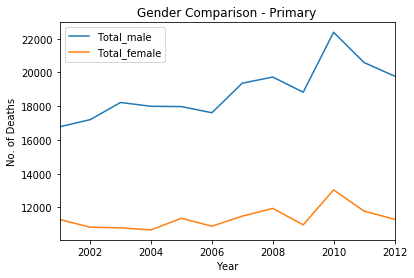

In [69]:
final_graph('Gender Comparison - Primary')